In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# ARIMA and Seasonal ARIMA
Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

Visualize the Time Series Data

Make the time series data stationary

Plot the Correlation and AutoCorrelation Charts

Construct the ARIMA Model or Seasonal ARIMA based on the data

Use the model to make predictions

In [ ]:
df = pd.read_csv('electricity_consumption.csv')

In [ ]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [ ]:
# first we have to make our data ready for univariate analysis 

In [ ]:
#  except one column im droping all columns
df.drop(['On_peak','Off_peak','Usage_charge','Billing_days'],axis=1,inplace=True)

In [ ]:
df.head()

,Bill_Date,Billed_amount
0,1/1/2016,247.73
1,2/1/2016,234.11
2,3/1/2016,123.85
3,4/1/2016,111.22
4,5/1/2016,118.37


In [ ]:
# changing date pattern and setting it for index
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

In [ ]:
df.head()

,Bill_Date,Billed_amount
0,2016-01-01,247.73
1,2016-02-01,234.11
2,2016-03-01,123.85
3,2016-04-01,111.22
4,2016-05-01,118.37


In [ ]:
df.set_index('Bill_Date',inplace=True)

In [ ]:
# data is ready for univariate analysis
df.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


In [ ]:
df.isnull().sum()

Billed_amount    0
dtype: int64

<AxesSubplot:xlabel='Bill_Date'>

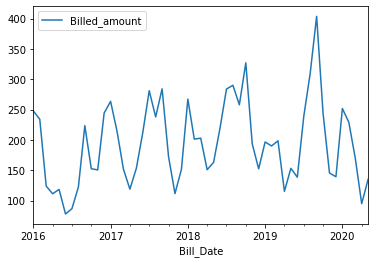

In [ ]:
# lets find it stationary or not
df.plot()  # from the graph we knows that it is like seasonal  so, not staionary

In [ ]:
# importing ada fuller library
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Billed_amount'])

In [ ]:
test_result

(-4.156495629052255,
 0.0007799874491884334,
 2,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 447.2224749308093)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

if test_result[1]<=0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

    


strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# it is non stationary so, we have to covert it as stationary

# Differencing

In [ ]:
df['Seasonal First Difference']=df['Billed_amount']-df['Billed_amount'].shift(1)

In [ ]:
df.head(20)

,Billed_amount,Seasonal First Difference
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,NaN
2016-05-01,118.37,NaN
2016-06-01,77.81,NaN
2016-07-01,86.67,NaN
2016-08-01,122.40,NaN
2016-09-01,223.62,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Billed_amount                0
Seasonal First Difference    0
dtype: int64

In [ ]:
test_result = adfuller(df['Seasonal First Difference'])

In [ ]:
test_result

(-4.075081381030422,
 0.0010645697378265256,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 331.61022034785253)

In [ ]:
if test_result[1]<=0.05:
    print('it is stationary')
else :
    print('it is not stationary')


it is stationary


<AxesSubplot:xlabel='Bill_Date'>

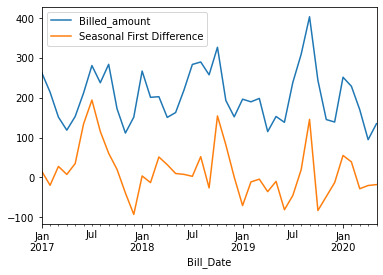

In [ ]:
df.plot()

<AxesSubplot:xlabel='Bill_Date'>

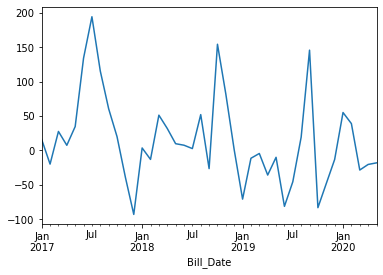

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

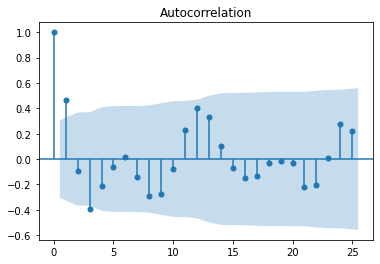

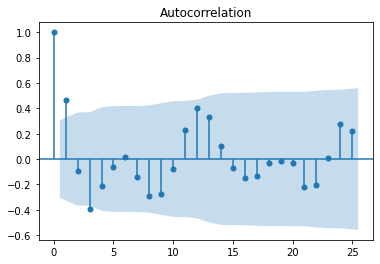

In [ ]:
plot_acf(df['Billed_amount'],lags=25)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 20.

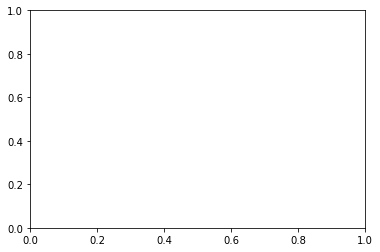

In [ ]:
plot_pacf(df['Billed_amount'],lags=20) #not for test data try it for train data

In [ ]:
pip install statsmodels==0.12.2

In [ ]:
df['Billed_amount'].shape

(41,)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)

NameError: name 'y_test' is not defined

# ARMA

In [ ]:
# from statsmodels.tsa.arima_model import ARMA

In [ ]:
# arma = ARMA(train data,order =(p and q)) # in the model we have to give train data and order

In [ ]:
# pred = arma.predict(start ,end)

In [ ]:
# mse and rmse